In [1]:
from bs4 import BeautifulSoup

import requests
import pandas as pd


In [2]:
url = "https://en.wikipedia.org/wiki/FIFA_World_Cup"

In [3]:
r = requests.get(url)

In [4]:
r.text

'<!DOCTYPE html>\n<html class="client-nojs" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title>FIFA World Cup - Wikipedia</title>\n<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"500b805b-fe2e-46e9-926a-bd453a745dad","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"FIFA_World_Cup","wgTitle":"FIFA World Cup","wgCurRevisionId":1017985833,"wgRevisionId":1017985833,"wgArticleId":11370,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Webarchive template wayback links","Wikipedia indefinitely semi-protected pages","Articles with short description","Short description matches Wikidata","Feature

In [5]:
html_page = BeautifulSoup(r.text, "html.parser")
html_page

<!DOCTYPE html>

<html class="client-nojs" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>FIFA World Cup - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"500b805b-fe2e-46e9-926a-bd453a745dad","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"FIFA_World_Cup","wgTitle":"FIFA World Cup","wgCurRevisionId":1017985833,"wgRevisionId":1017985833,"wgArticleId":11370,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Webarchive template wayback links","Wikipedia indefinitely semi-protected pages","Articles with short description","Short description matches Wikidata","Featured art

In [6]:
print(html_page.prettify())

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   FIFA World Cup - Wikipedia
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"500b805b-fe2e-46e9-926a-bd453a745dad","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"FIFA_World_Cup","wgTitle":"FIFA World Cup","wgCurRevisionId":1017985833,"wgRevisionId":1017985833,"wgArticleId":11370,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Webarchive template wayback links","Wikipedia indefinitely semi-protected pages","Articles with short description","Short description matches Wikida

In [7]:
stat_table = html_page.find_all('table')
stat_table = stat_table[7]

In [8]:
for row in stat_table.find_all('tr'):
    for cell in row.find_all('td'):
        print(cell.text)

1

 Brazil

21

109

73

18

18

229

105

124

237

2.17

5

2

 Germany[120]

19

109

67

20

22

226

125

101

221

2.03

4

3

 Italy

18

83

45

21

17

128

77

51

156

1.88

4

4

 Argentina

17

81

43

15

23

137

93

44

144

1.78

2

5

 France

15

66

34

13

19

120

77

43

115

1.74

2

6

 England

15

69

29

21

19

91

64

27

108

1.59

1

7

 Spain

15

63

30

15

18

99

72

27

105

1.67

1

8

 Uruguay

13

56

24

12

20

87

74

13

84

1.50

2



In [57]:
df = pd.read_html(str(stat_table))


In [69]:

df[0].at[1,'Team'] = 'Germany'
df[0]

,Rank,Team,Participations,Pld,W,D,L,GF,GA,GD,Pts,AvgPts,Trophies
0,1,Brazil,21,109,73,18,18,229,105,124,237,2.17,5
1,2,Germany,19,109,67,20,22,226,125,101,221,2.03,4
2,3,Italy,18,83,45,21,17,128,77,51,156,1.88,4
3,4,Argentina,17,81,43,15,23,137,93,44,144,1.78,2
4,5,France,15,66,34,13,19,120,77,43,115,1.74,2
5,6,England,15,69,29,21,19,91,64,27,108,1.59,1
6,7,Spain,15,63,30,15,18,99,72,27,105,1.67,1
7,8,Uruguay,13,56,24,12,20,87,74,13,84,1.50,2


In [75]:
import matplotlib.pyplot as plt

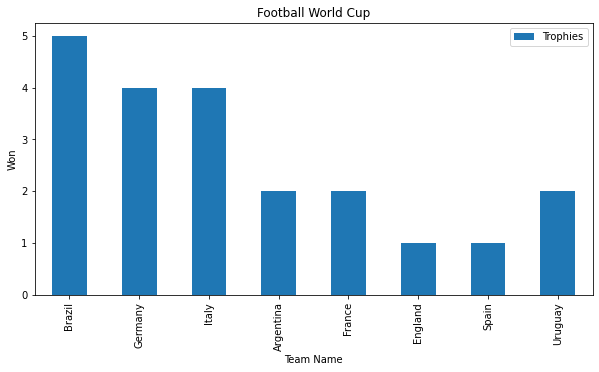

In [90]:
df[0].plot(kind='bar', x='Team', y='Trophies', figsize=(10, 5))
plt.xlabel("Team Name")
plt.ylabel("Won")
plt.title("Football World Cup")

plt.show()
